<a href="https://colab.research.google.com/github/Rathamsettygovardhan/Life_expectancy-Data-preprocessing-EDA-Wrangling/blob/master/LE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Preprocessing, EDA and Wrangling

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
pd.set_option('display.max_columns', None)

In [2]:
dff=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Life Expectancy Data.csv')

In [3]:
dff

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
dff.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
##Cleaning
dff.shape

(2938, 22)

In [6]:
a=[miss_val for miss_val in dff.columns if dff[miss_val].isnull().sum()>1]
for miss_val in a:
  print(miss_val , ' ',round(dff[miss_val].isnull().mean(), 3), '% Missing values')

#df.isnull().sum()/df.shape[0]*100

Life expectancy    0.003 % Missing values
Adult Mortality   0.003 % Missing values
Alcohol   0.066 % Missing values
Hepatitis B   0.188 % Missing values
 BMI    0.012 % Missing values
Polio   0.006 % Missing values
Total expenditure   0.077 % Missing values
Diphtheria    0.006 % Missing values
GDP   0.152 % Missing values
Population   0.222 % Missing values
 thinness  1-19 years   0.012 % Missing values
 thinness 5-9 years   0.012 % Missing values
Income composition of resources   0.057 % Missing values
Schooling   0.055 % Missing values


In [7]:
dff.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
dff.columns=dff.columns.str.replace(' ', '')

In [9]:
sorted_col_list =sorted(dff.columns)

df=dff[sorted_col_list]

df

,AdultMortality,Alcohol,BMI,Country,Diphtheria,GDP,HIV/AIDS,HepatitisB,Incomecompositionofresources,Lifeexpectancy,Measles,Polio,Population,Schooling,Status,Totalexpenditure,Year,infantdeaths,percentageexpenditure,thinness1-19years,thinness5-9years,under-fivedeaths
0,263.0,0.01,19.1,Afghanistan,65.0,584.259210,0.1,65.0,0.479,65.0,1154,6.0,33736494.0,10.1,Developing,8.16,2015,62,71.279624,17.2,17.3,83
1,271.0,0.01,18.6,Afghanistan,62.0,612.696514,0.1,62.0,0.476,59.9,492,58.0,327582.0,10.0,Developing,8.18,2014,64,73.523582,17.5,17.5,86
2,268.0,0.01,18.1,Afghanistan,64.0,631.744976,0.1,64.0,0.470,59.9,430,62.0,31731688.0,9.9,Developing,8.13,2013,66,73.219243,17.7,17.7,89
3,272.0,0.01,17.6,Afghanistan,67.0,669.959000,0.1,67.0,0.463,59.5,2787,67.0,3696958.0,9.8,Developing,8.52,2012,69,78.184215,17.9,18.0,93
4,275.0,0.01,17.2,Afghanistan,68.0,63.537231,0.1,68.0,0.454,59.2,3013,68.0,2978599.0,9.5,Developing,7.87,2011,71,7.097109,18.2,18.2,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,723.0,4.36,27.1,Zimbabwe,65.0,454.366654,33.6,68.0,0.407,44.3,31,67.0,12777511.0,9.2,Developing,7.13,2004,27,0.000000,9.4,9.4,42
2934,715.0,4.06,26.7,Zimbabwe,68.0,453.351155,36.7,7.0,0.418,44.5,998,7.0,12633897.0,9.5,Developing,6.52,2003,26,0.000000,9.8,9.9,41
2935,73.0,4.43,26.3,Zimbabwe,71.0,57.348340,39.8,73.0,0.427,44.8,304,73.0,125525.0,10.0,Developing,6.53,2002,25,0.000000,1.2,1.3,40
2936,686.0,1.72,25.9,Zimbabwe,75.0,548.587312,42.1,76.0,0.427,45.3,529,76.0,12366165.0,9.8,Developing,6.16,2001,25,0.000000,1.6,1.7,39


In [10]:
in_fill=df.Incomecompositionofresources.mean()
le=df.Lifeexpectancy.mean()
p=df.Polio.mean()
pop=df.Population.mean()
sc=df.Schooling.mean()
te=df.Totalexpenditure.mean()
df.Incomecompositionofresources.fillna(in_fill, inplace=True)
df.Lifeexpectancy.fillna(le,inplace=True)
df.Polio.fillna(p,inplace=True)
df.Population.fillna(pop,inplace=True)
df.Schooling.fillna(sc,inplace=True)
df.Totalexpenditure.fillna(te,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [11]:
df.drop(['thinness1-19years','thinness5-9years', 'under-fivedeaths'], inplace=True, axis=1)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
#df=df[df['GDP'].isnull()]

#df.Country.value_counts()       # Many countries without GDP info........lets fill 0, since mean will input high gpd 

df.GDP.fillna(0, inplace=True)

In [13]:
#df.drop(['under-fivedeaths','thinness5-9years', 'thinness1-19years'], axis=1, inplace=True)

In [14]:
df.AdultMortality.fillna(0, inplace=True)      # mortality with 0 fill

#f=df[df.Alcohol.isnull()]                  #Alcohol Nan filling

#f.Country.value_counts()                 

#df[df['Country']=='South Sudan']

df.Alcohol.fillna(0, inplace=True)

In [15]:
#df[df['BMI'].isnull()]  # all Sudan and south sudan.. Most of their details were nan, so deleting the whole rows of South sudan and sudan......

con=df[(df['Country']=='South Sudan') | (df['Country']=='Sudan')].index

df.drop(con, inplace= True)

#Remaining Two nan values of bmi filling with zero...........

df['BMI'].fillna(0, inplace=True)

In [16]:
hep_mean=df.HepatitisB.mean()

df['HepatitisB'].fillna(hep_mean, inplace=True)    # Filling Mean value of vaccination 

In [17]:
df.isnull().sum()

AdultMortality                  0
Alcohol                         0
BMI                             0
Country                         0
Diphtheria                      8
GDP                             0
HIV/AIDS                        0
HepatitisB                      0
Incomecompositionofresources    0
Lifeexpectancy                  0
Measles                         0
Polio                           0
Population                      0
Schooling                       0
Status                          0
Totalexpenditure                0
Year                            0
infantdeaths                    0
percentageexpenditure           0
dtype: int64

In [18]:
df.columns

Index(['AdultMortality', 'Alcohol', 'BMI', 'Country', 'Diphtheria', 'GDP',
       'HIV/AIDS', 'HepatitisB', 'Incomecompositionofresources',
       'Lifeexpectancy', 'Measles', 'Polio', 'Population', 'Schooling',
       'Status', 'Totalexpenditure', 'Year', 'infantdeaths',
       'percentageexpenditure'],
      dtype='object')

In [19]:
df[df['Lifeexpectancy']==df.Lifeexpectancy.max()]

,AdultMortality,Alcohol,BMI,Country,Diphtheria,GDP,HIV/AIDS,HepatitisB,Incomecompositionofresources,Lifeexpectancy,Measles,Polio,Population,Schooling,Status,Totalexpenditure,Year,infantdeaths,percentageexpenditure
241,76.0,12.60,63.4,Belgium,99.0,47439.39684,0.1,98.000000,0.890,89.0,70,99.0,1.129570e+05,16.3,Developed,1.59,2014,0,7163.348923
915,78.0,8.80,61.7,Finland,98.0,49914.61864,0.1,81.001264,0.890,89.0,0,98.0,5.461512e+06,17.0,Developing,9.68,2014,0,6164.455402
937,88.0,11.90,59.1,France,98.0,45413.65710,0.1,47.000000,0.877,89.0,604,98.0,6.437499e+06,16.1,Developing,1.57,2008,3,7002.785925
938,89.0,12.20,58.6,France,98.0,416.58397,0.1,42.000000,0.873,89.0,39,99.0,6.416229e+06,16.1,Developing,1.45,2007,3,64.737149
995,69.0,11.03,61.9,Germany,95.0,4792.65288,0.1,88.000000,0.920,89.0,443,94.0,8.982500e+04,17.0,Developed,11.30,2014,2,941.756291
1293,66.0,8.98,57.6,Italy,94.0,31174.56118,0.1,96.000000,0.846,89.0,599,97.0,5.768533e+07,15.6,Developed,8.49,2004,2,4270.914882
1850,71.0,9.62,64.8,New Zealand,93.0,33691.34837,0.1,9.000000,0.899,89.0,43,93.0,1.275338e+07,20.3,Developed,11.20,2010,0,6664.148708
1916,67.0,6.68,58.5,Norway,94.0,817.77681,0.1,81.001264,0.936,89.0,2,94.0,4.828726e+06,17.4,Developed,9.49,2009,0,142.374943
2056,78.0,9.88,6.9,Portugal,98.0,2277.53613,0.1,98.000000,0.837,89.0,0,98.0,1.416200e+04,16.8,Developed,9.50,2014,0,271.254553
2433,72.0,11.05,61.7,Spain,96.0,3279.41400,0.1,96.000000,0.849,89.0,267,96.0,4.522683e+06,16.0,Developed,8.36,2007,2,510.932701


In [20]:
#df.groupby(by=[ 'Year','Status', 'Country', 'Lifeexpectancy']).sum().isnull().sum()  # no nulls
df2=df.groupby(by=[ 'Year','Status','Country','Lifeexpectancy']).sum()
df2

AdultMortality  \
Year Status     Country                            Lifeexpectancy                   
2000 Developed  Australia                          79.5                      78.0   
                Austria                            78.1                      96.0   
                Belgium                            77.6                      11.0   
                Bulgaria                           71.1                     163.0   
                Croatia                            74.7                     127.0   
...                                                                           ...   
2015 Developing Venezuela (Bolivarian Republic of) 74.1                     157.0   
                Viet Nam                           76.0                     127.0   
                Yemen                              65.7                     224.0   
                Zambia                             61.8                      33.0   
                Zimbabwe                           67.0                     336.0   

                                                                   Alcohol  \
Year Status     Country                            Lifeexpectancy            
2000 Developed  Australia                          79.5              10.17   
                Austria                            78.1              13.20   
                Belgium                            77.6              11.21   
                Bulgaria                           71.1               9.69   
                Croatia                            74.7              12.73   
...                                                                    ...   
2015 Developing Venezuela (Bolivarian Republic of) 74.1               0.00   
                Viet Nam                           76.0               0.00   
                Yemen                              65.7               0.00   
                Zambia                             61.8               0.00   
                Zimbabwe                           67.0               0.00   

                                                                    BMI  \
Year Status     Country                            Lifeexpectancy         
2000 Developed  Australia                          79.5            58.2   
                Austria                            78.1             5.1   
                Belgium                            77.6            58.1   
                Bulgaria                           71.1            57.0   
                Croatia                            74.7            54.7   
...                                                                 ...   
2015 Developing Venezuela (Bolivarian Republic of) 74.1            62.1   
                Viet Nam                           76.0            17.5   
                Yemen                              65.7            41.3   
                Zambia                             61.8            23.4   
                Zimbabwe                           67.0            31.8   

                                                                   Diphtheria  \
Year Status     Country                            Lifeexpectancy               
2000 Developed  Australia                          79.5                   9.0   
                Austria                            78.1                  81.0   
                Belgium                            77.6                  95.0   
                Bulgaria                           71.1                  93.0   
                Croatia                            74.7                  93.0   
...                                                                       ...   
2015 Developing Venezuela (Bolivarian Republic of) 74.1                  87.0   
                Viet Nam                           76.0                  97.0   
                Yemen                              65.7                  69.0   
                Zambia                             61.8                   9.0  

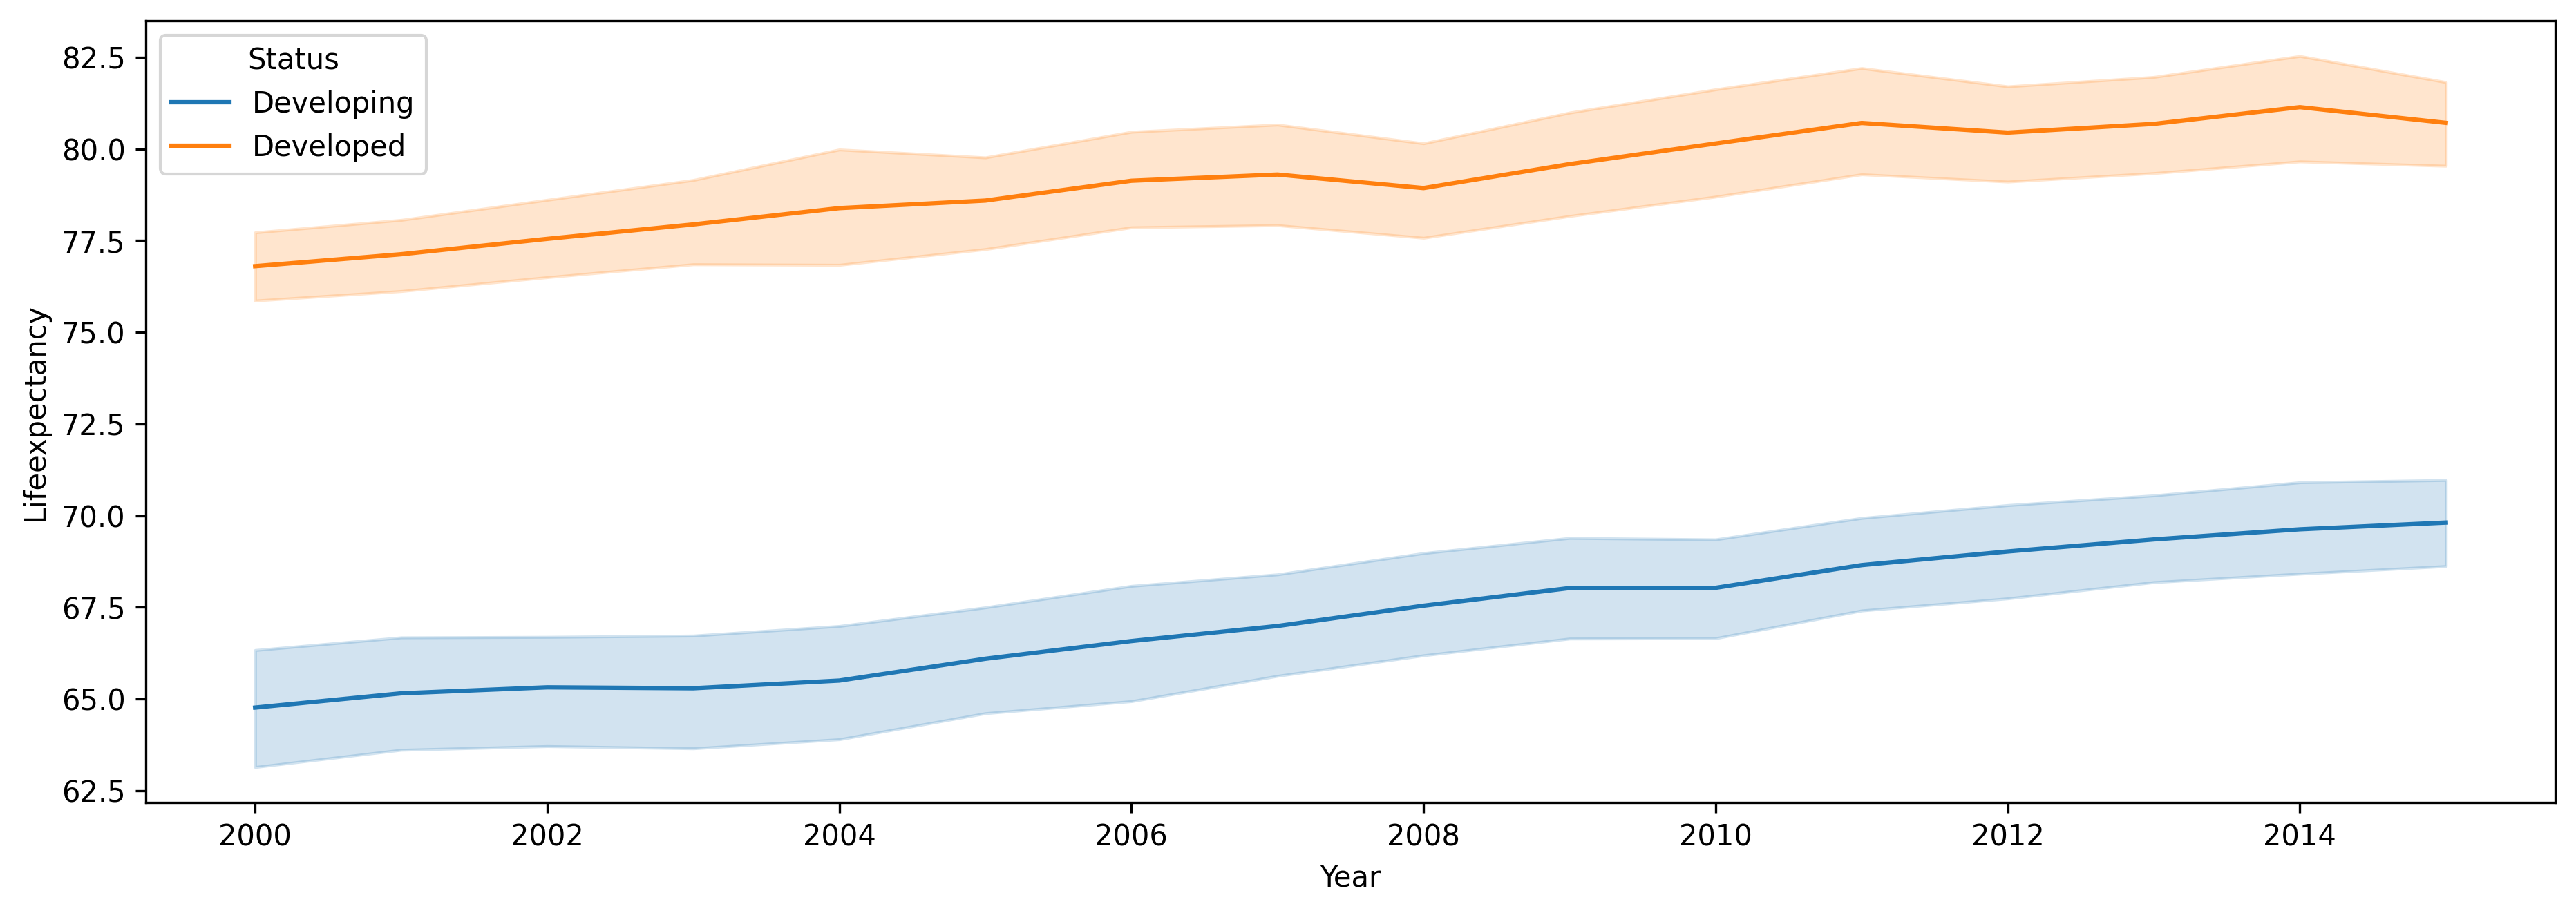

In [21]:
df1=df[['Lifeexpectancy', 'Year', 'Status']]
fig=plt.figure(figsize=(15,5), dpi=300)
sns.lineplot(data=df1, x='Year', y='Lifeexpectancy', hue='Status')
#fig.savefig('a.png', bbox_inches='tight')
plt.show()

In [22]:
#Life expectancy vs Year 

fig=px.scatter(data_frame=df,x='Lifeexpectancy', y='Year',template='plotly_dark',color = 'Status', opacity=.3)
fig.show()

In [23]:
x=df.where(df['Year']==2015)
y_2015=x.dropna(how='all')

x=df.where(df['Year']==2014)
y_2014=x.dropna(how='all')

x=df.where(df['Year']==2013)
y_2013=x.dropna(how='all')

x=df.where(df['Year']==2012)
y_2012=x.dropna(how='all')

x=df.where(df['Year']==2011)
y_2011=x.dropna(how='all')

x=df.where(df['Year']==2010)
y_2010=x.dropna(how='all')

x=df.where(df['Year']==2009)
y_2009=x.dropna(how='all')

x=df.where(df['Year']==2008)
y_2008=x.dropna(how='all')

x=df.where(df['Year']==2007)
y_2007=x.dropna(how='all')

x=df.where(df['Year']==2006)
y_2006=x.dropna(how='all')

x=df.where(df['Year']==2005)
y_2005=x.dropna(how='all')

x=df.where(df['Year']==2004)
y_2004=x.dropna(how='all')

x=df.where(df['Year']==2003)
y_2003=x.dropna(how='all')

x=df.where(df['Year']==2002)
y_2002=x.dropna(how='all')

x=df.where(df['Year']==2001)
y_2001=x.dropna(how='all')

x=df.where(df['Year']==2000)
y_2000=x.dropna(how='all')

#impact of Immunization coverage on life Expectancy

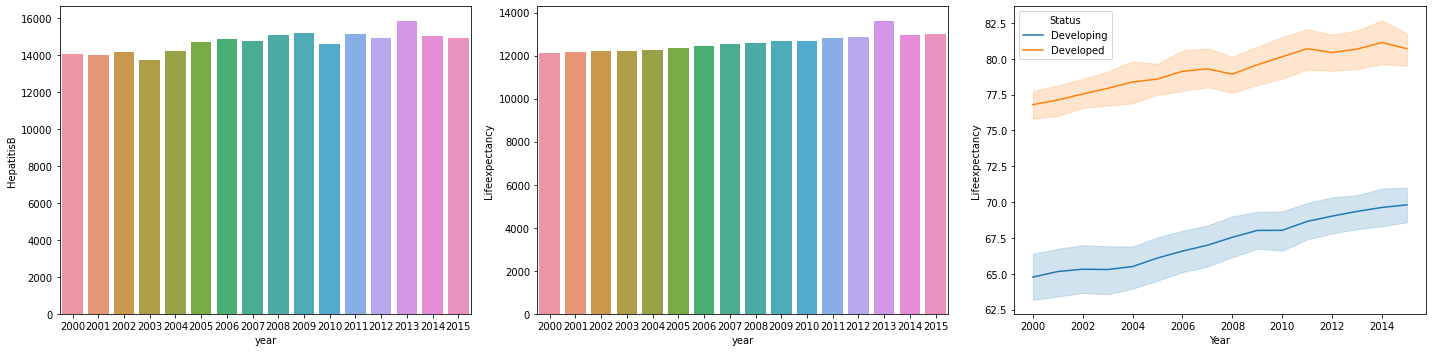

In [24]:
df3=df[['Status','Lifeexpectancy', 'HepatitisB','Country', 'Year']]

df4=df3.groupby(['Year']).sum()

df4['year'] = df4.index

plt.rcParams["figure.figsize"] = [20, 5]
plt.rcParams["figure.autolayout"] = True

f, axs = plt.subplots(1,3)

sns.barplot(data=df4, x='year', y='HepatitisB', ax=axs[0])

sns.barplot(data=df4, x='year', y='Lifeexpectancy', ax=axs[1])

sns.lineplot(data=df3, y='Lifeexpectancy', x='Year', hue='Status',ax=axs[2])


plt.show()

##Do densely populated countries tend to have lower life expectancy?


In [25]:
pop=df[['Population', 'Lifeexpectancy','Country', 'Year']]

x=px.scatter(pop, x='Lifeexpectancy', y='Population', color='Country')

x.show()

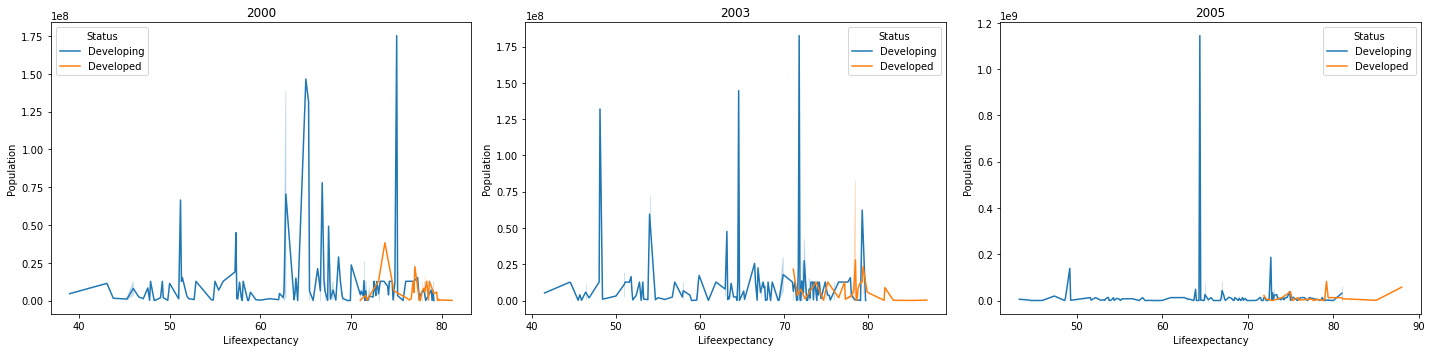

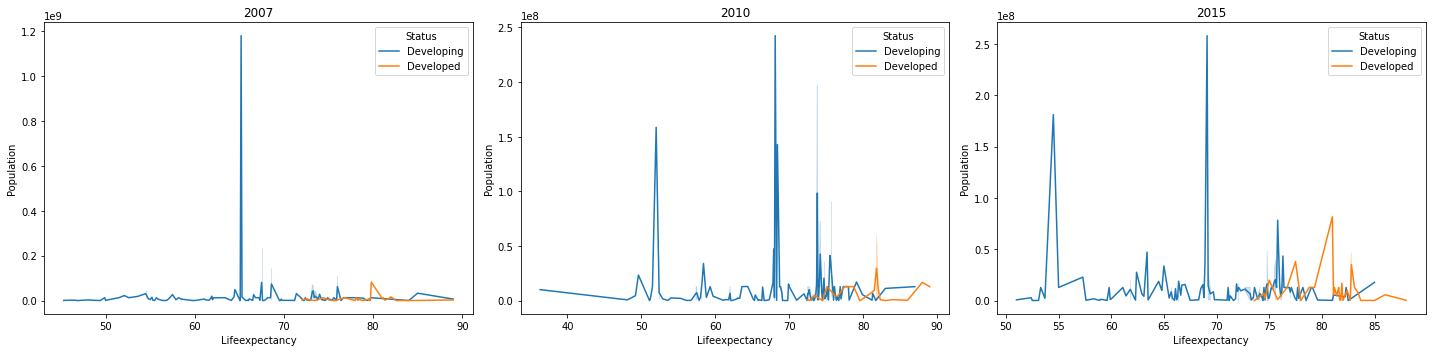

In [253]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.rcParams["figure.autolayout"] = True

f, axs = plt.subplots(1,3)

sns.lineplot(data=y_2000, x='Lifeexpectancy', y='Population',hue='Status', ax=axs[0]).set(title='2000')

sns.lineplot(data=y_2003, x='Lifeexpectancy', y='Population', hue='Status',ax=axs[1]).set(title='2003')

sns.lineplot(data=y_2005, x='Lifeexpectancy', y='Population', hue='Status',ax=axs[2]).set(title='2005')

f, axs = plt.subplots(1,3)

sns.lineplot(data=y_2007, x='Lifeexpectancy', y='Population', hue='Status',ax=axs[0]).set(title='2007')

sns.lineplot(data=y_2010, x='Lifeexpectancy', y='Population', hue='Status',ax=axs[1]).set(title='2010')

sns.lineplot(data=y_2015, x='Lifeexpectancy', y='Population', hue='Status',ax=axs[2]).set(title='2015')

p1=px.scatter(y_2000, y='Population', x='Lifeexpectancy', color='Country',title='2000')

p2=px.scatter(y_2014, y='Population', x='Lifeexpectancy', color='Country',title='2014')
plt.show()
p1.show()
p2.show()

##Does Life Expectancy have positive or negative relationship with drinking alcohol?

In [27]:
alco_df=df[['Lifeexpectancy', 'Alcohol', 'Country', 'Year', 'Population']]

alco_df['alco_Population'] = (alco_df['Population'])*(alco_df['Alcohol'])  #Overall Alcohol consuming population in a country

alco_viz=alco_df.groupby(['Country'])[['Lifeexpectancy', 'alco_Population']].mean()

<ipython-input-27-d653ed77b73c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
alco_viz['alco_Population']=alco_viz['alco_Population']/100
alco_viz['Lifeexpectancy']=alco_viz['Lifeexpectancy']/100
alco_viz['ctry'] = alco_viz.index

In [29]:

#sns.lineplot(data=alco_viz, x='Lifeexpectancy', y='alco_Population')

a=px.scatter_3d(alco_viz, x='Lifeexpectancy', y='alco_Population',z='ctry',template='seaborn',animation_group='Lifeexpectancy',color='ctry')

a.show()

In [248]:
# This crime index doesnt seem correct, so lets find the crime index data ad combine it.

##What is the impact of schooling on the lifespan of humans?

In [30]:
fig=px.scatter(data_frame=df,x='Lifeexpectancy', y='Schooling',template='plotly_dark',color = 'Status', opacity=.6)
fig.show()

##How crime effected the Life expectancy?

In [234]:
crime=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/food security and nutrition.csv')

dum=crime[crime['Item']=='Political stability and absence of violence/terrorism (index)']
crime1=dum.iloc[:,[3,9,11]]

crime1=crime1.rename(columns={'Area':'Country', 'Value':'Crimeindex'})

crime1.reset_index(inplace=True)

crime1.drop(labels='index', axis=1, inplace=True)

crime1

,Country,Year,Crimeindex
0,Afghanistan,2000,-2.44
1,Afghanistan,2002,-2.04
2,Afghanistan,2003,-2.2
3,Afghanistan,2004,-2.3
4,Afghanistan,2005,-2.07
...,...,...,...
3109,Zimbabwe,2012,-0.78
3110,Zimbabwe,2013,-0.67
3111,Zimbabwe,2014,-0.71
3112,Zimbabwe,2015,-0.62


In [235]:
ne={2002:2001,2003:2002,2004:2003,2005:2004,2006:2005,2007:2006,2008:2007, 2009:2008, 2010:2009, 2011:2010, 2012:2011, 2013:2012, 2014:2013, 2015:2014, 2016:2015}
crime1.Year=crime1.Year.replace(ne)

In [236]:
crime1.Year.value_counts()

2009    198
2010    198
2011    197
2012    197
2013    197
2014    197
2015    197
2016    197
2006    195
2007    195
2008    195
2004    194
2005    194
2003    193
2000    185
2002    185
Name: Year, dtype: int64

In [246]:
x=crime1.where(crime1['Year']==2015)
c_15=x.dropna(how='all')
x=crime1.where(crime1['Year']==2014)
c_14=x.dropna(how='all')
x=crime1.where(crime1['Year']==2013)
c_13=x.dropna(how='all')
x=crime1.where(crime1['Year']==2012)
c_12=x.dropna(how='all')
x=crime1.where(crime1['Year']==2011)
c_11=x.dropna(how='all')
x=crime1.where(crime1['Year']==2010)
c_10=x.dropna(how='all')
x=crime1.where(crime1['Year']==2009)
c_09=x.dropna(how='all')
x=crime1.where(crime1['Year']==2008)
c_08=x.dropna(how='all')
x=crime1.where(crime1['Year']==2007)
c_07=x.dropna(how='all')
x=crime1.where(crime1['Year']==2006)
c_06=x.dropna(how='all')
x=crime1.where(crime1['Year']==2005)
c_05=x.dropna(how='all')
x=crime1.where(crime1['Year']==2004)
c_04=x.dropna(how='all')
x=crime1.where(crime1['Year']==2003)
c_03=x.dropna(how='all')
x=crime1.where(crime1['Year']==2002)
c_02=x.dropna(how='all')
x=crime1.where(crime1['Year']==2001)
c_01=x.dropna(how='all')
x=crime1.where(crime1['Year']==2000)
c_0=x.dropna(how='all')

In [239]:
crime1.Crimeindex=crime1.Crimeindex.astype('float')
crime1.Year=crime1.Year.astype('int')
crime1.dtypes

Country        object
Year            int64
Crimeindex    float64
dtype: object

In [240]:
crime_df=df.merge(crime1, how='left')
crime_df

,AdultMortality,Alcohol,BMI,Country,Diphtheria,GDP,HIV/AIDS,HepatitisB,Incomecompositionofresources,Lifeexpectancy,Measles,Polio,Population,Schooling,Status,Totalexpenditure,Year,infantdeaths,percentageexpenditure,Crimeindex
0,263.0,0.01,19.1,Afghanistan,65.0,584.259210,0.1,65.0,0.479,65.0,1154,6.0,33736494.0,10.1,Developing,8.16,2015,62,71.279624,-2.57
1,271.0,0.01,18.6,Afghanistan,62.0,612.696514,0.1,62.0,0.476,59.9,492,58.0,327582.0,10.0,Developing,8.18,2014,64,73.523582,-2.41
2,268.0,0.01,18.1,Afghanistan,64.0,631.744976,0.1,64.0,0.470,59.9,430,62.0,31731688.0,9.9,Developing,8.13,2013,66,73.219243,-2.52
3,272.0,0.01,17.6,Afghanistan,67.0,669.959000,0.1,67.0,0.463,59.5,2787,67.0,3696958.0,9.8,Developing,8.52,2012,69,78.184215,-2.42
4,275.0,0.01,17.2,Afghanistan,68.0,63.537231,0.1,68.0,0.454,59.2,3013,68.0,2978599.0,9.5,Developing,7.87,2011,71,7.097109,-2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2901,723.0,4.36,27.1,Zimbabwe,65.0,454.366654,33.6,68.0,0.407,44.3,31,67.0,12777511.0,9.2,Developing,7.13,2004,27,0.000000,-1.21
2902,715.0,4.06,26.7,Zimbabwe,68.0,453.351155,36.7,7.0,0.418,44.5,998,7.0,12633897.0,9.5,Developing,6.52,2003,26,0.000000,-1.09
2903,73.0,4.43,26.3,Zimbabwe,71.0,57.348340,39.8,73.0,0.427,44.8,304,73.0,125525.0,10.0,Developing,6.53,2002,25,0.000000,-1.52
2904,686.0,1.72,25.9,Zimbabwe,75.0,548.587312,42.1,76.0,0.427,45.3,529,76.0,12366165.0,9.8,Developing,6.16,2001,25,0.000000,NaN


In [241]:
px.scatter(data_frame=crime_df.groupby(['Year'], as_index=False).mean(), x='Lifeexpectancy', y='Crimeindex', color='Year')

In [247]:
# If country wise, yearly comparision

n=px.bar(c_0, y='Crimeindex', color='Country', title='2000')
m=px.bar(c_15, y='Crimeindex', color='Country',title='2015')
n.show()
m.show()

In [243]:
o=crime1.groupby(by=['Year'], as_index=False).sum()

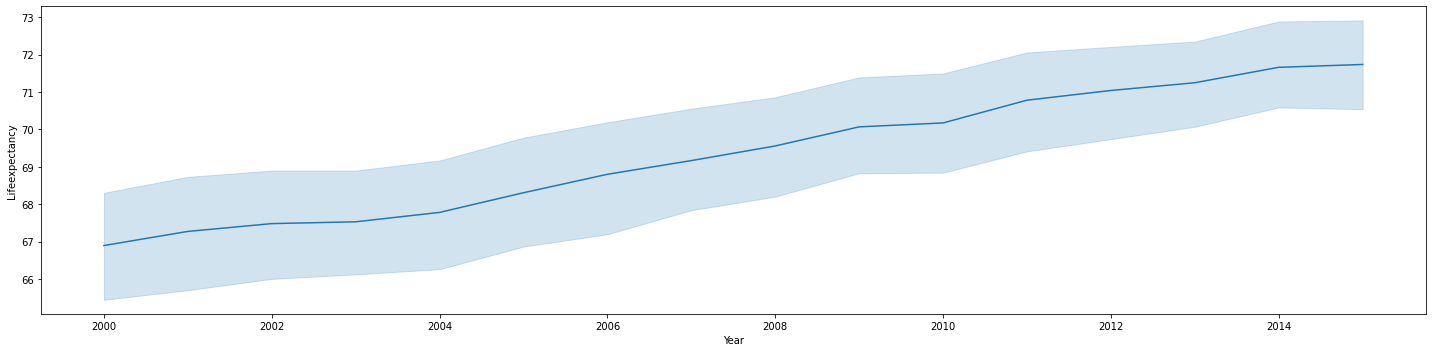

In [244]:
m=px.line(o, x='Year', y='Crimeindex')

sns.lineplot(data=df, x='Year', y='Lifeexpectancy')
m.show()
plt.show()

####Cereal_import_dependency,..........Arable_land_equipped_for_irrigation..........Population_with_basic_drinking_water

In [102]:
crime=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/food security and nutrition.csv')
z=crime[(crime['Item']=='Percentage of population using at least basic drinking water services (percent)') |(crime['Item']=='Percent of arable land equipped for irrigation (percent) (3-year average)')|(crime['Item']=='Cereal import dependency ratio (percent) (3-year average)')|(crime['Item']=='Number of people undernourished (million) (3-year average)')|(crime['Item']=='Political stability and absence of violence/terrorism (index)')]

In [103]:
z.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
101,FS,Suite of Food Security Indicators,4,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-y...,20002002,2000-2002,millions,10.3,E,Estimated value,NaN
102,FS,Suite of Food Security Indicators,4,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-y...,20012003,2001-2003,millions,10.3,E,Estimated value,NaN
103,FS,Suite of Food Security Indicators,4,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-y...,20022004,2002-2004,millions,9.6,E,Estimated value,NaN
104,FS,Suite of Food Security Indicators,4,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-y...,20032005,2003-2005,millions,9.4,E,Estimated value,NaN
105,FS,Suite of Food Security Indicators,4,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-y...,20042006,2004-2006,millions,9.2,E,Estimated value,NaN


In [104]:
new_df=z.iloc[:,[3,7,9,11]]
new_df

,Area,Item,Year,Value
101,Afghanistan,Number of people undernourished (million) (3-y...,2000-2002,10.3
102,Afghanistan,Number of people undernourished (million) (3-y...,2001-2003,10.3
103,Afghanistan,Number of people undernourished (million) (3-y...,2002-2004,9.6
104,Afghanistan,Number of people undernourished (million) (3-y...,2003-2005,9.4
105,Afghanistan,Number of people undernourished (million) (3-y...,2004-2006,9.2
...,...,...,...,...
117181,Zimbabwe,Percentage of population using at least basic ...,2012,66.5
117182,Zimbabwe,Percentage of population using at least basic ...,2013,66
117183,Zimbabwe,Percentage of population using at least basic ...,2014,65.5
117184,Zimbabwe,Percentage of population using at least basic ...,2015,65


In [105]:
fo = {'2000-2002':'2000','2001-2003':'2001','2002-2004':'2002','2003-2005':'2003','2004-2006':'2004','2005-2007':'2005','2006-2008':'2006','2007-2009':'2007'\
      ,'2008-2010':'2008','2009-2011':'2009','2010-2012':'2010','2011-2013':'2011','2012-2014':'2012','2013-2015':'2013','2014-2016':'2014','2015-2017':'2015'}

In [106]:
new_df.Year=new_df.Year.replace(fo)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [107]:
new_df.Item.value_counts()

Percentage of population using at least basic drinking water services (percent)    3375
Number of people undernourished (million) (3-year average)                         3264
Cereal import dependency ratio (percent) (3-year average)                          3264
Percent of arable land equipped for irrigation (percent) (3-year average)          3264
Political stability and absence of violence/terrorism (index)                      3114
Name: Item, dtype: int64

In [108]:
d=new_df[new_df['Year']=='2016'].index
new_df.drop(d, inplace=True)

re={'Area':'Country'}
new_df.rename(re, axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [109]:
ren={'Cereal import dependency ratio (percent) (3-year average)':'Cereal_import_dependency',
     'Percent of arable land equipped for irrigation (percent) (3-year average)':'Arable_land_equipped_for_irrigation',
     'Percentage of population using at least basic drinking water services (percent)':'Population_with_basic_drinking_water',
     'Number of people undernourished (million) (3-year average)':'Undernourished_pop',
     'Political stability and absence of violence/terrorism (index)':'Crime'}

new_df.Item.replace(ren, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [110]:
new_df.Item.value_counts()

Undernourished_pop                      3264
Cereal_import_dependency                3264
Arable_land_equipped_for_irrigation     3264
Population_with_basic_drinking_water    3175
Crime                                   2917
Name: Item, dtype: int64

In [111]:
col1=new_df[new_df.Item=='Cereal_import_dependency']
col2=new_df[new_df.Item=='Arable_land_equipped_for_irrigation']
col3=new_df[new_df.Item=='Population_with_basic_drinking_water']
col4=new_df[new_df.Item=='Undernourished_pop']
col5=new_df[new_df.Item=='Crime']

In [112]:
col1.dtypes

Country    object
Item       object
Year       object
Value      object
dtype: object

In [113]:
col3

,Country,Item,Year,Value
304,Afghanistan,Population_with_basic_drinking_water,2000,28.2
305,Afghanistan,Population_with_basic_drinking_water,2001,28.2
306,Afghanistan,Population_with_basic_drinking_water,2002,30.2
307,Afghanistan,Population_with_basic_drinking_water,2003,32.3
308,Afghanistan,Population_with_basic_drinking_water,2004,34.3
...,...,...,...,...
117180,Zimbabwe,Population_with_basic_drinking_water,2011,67
117181,Zimbabwe,Population_with_basic_drinking_water,2012,66.5
117182,Zimbabwe,Population_with_basic_drinking_water,2013,66
117183,Zimbabwe,Population_with_basic_drinking_water,2014,65.5


In [114]:
col1.Year=col1.Year.astype('int')

col1.Value=col1.Value.astype('float')

col1.rename({'Value':'Cereal_import_dependence'}, axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [115]:
col2.Year=col2.Year.astype('int')

col2.Value=col2.Value.astype('float')

col2.rename({'Value':'Arable_land_equipped_for_irrigation'}, axis=1,inplace=True)

In [116]:
col3.Year=col3.Year.astype('int')

col3.Value=col3.Value.astype('float')

col3.rename({'Value':'Population_with_basic_drinking_water'}, axis=1,inplace=True)

In [117]:
col4.Value.value_counts()

<0.1    337
0.3     143
0.2     134
0.4      77
0.1      58
       ... 
24.3      1
27.8      1
27.9      1
29        1
6.4       1
Name: Value, Length: 238, dtype: int64

In [118]:
col4.Value=col4.Value.str.replace('<','')

In [119]:
col4.Year=col4.Year.astype('int')

col4.Value=col4.Value.astype('float')

col4.rename({'Value':'Undernourished_pop'}, axis=1,inplace=True)

In [120]:
col5.Year=col5.Year.astype('int')

col5.Value=col5.Value.astype('float')

col5.rename({'Value':'Crime'}, axis=1,inplace=True)

In [121]:
cereal_col=col1.iloc[:,[0,2,3]]
arable_col=col2.iloc[:,[0,2,3]]
water_col=col3.iloc[:,[0,2,3]]
undernourished=col4.iloc[:,[0,2,3]]
crime=col5.iloc[:,[0,2,3]]

In [122]:
cer_df1 = df.merge(cereal_col, how='left')

In [123]:
cer_df2=cer_df1.merge(arable_col,how='left')

cer_df3=cer_df2.merge(water_col,how='left')

cer_df4=cer_df3.merge(undernourished,how='left')

cer_df5=cer_df4.merge(crime,how='left')


In [124]:
cer_df5

,AdultMortality,Alcohol,BMI,Country,Diphtheria,GDP,HIV/AIDS,HepatitisB,Incomecompositionofresources,Lifeexpectancy,Measles,Polio,Population,Schooling,Status,Totalexpenditure,Year,infantdeaths,percentageexpenditure,Cereal_import_dependence,Arable_land_equipped_for_irrigation,Population_with_basic_drinking_water,Undernourished_pop,Crime
0,263.0,0.01,19.1,Afghanistan,65.0,584.259210,0.1,65.0,0.479,65.0,1154,6.0,33736494.0,10.1,Developing,8.16,2015,62,71.279624,34.2,41.5,61.3,7.8,-2.57
1,271.0,0.01,18.6,Afghanistan,62.0,612.696514,0.1,62.0,0.476,59.9,492,58.0,327582.0,10.0,Developing,8.18,2014,64,73.523582,27.0,41.4,58.7,7.4,-2.41
2,268.0,0.01,18.1,Afghanistan,64.0,631.744976,0.1,64.0,0.470,59.9,430,62.0,31731688.0,9.9,Developing,8.13,2013,66,73.219243,23.2,41.3,56.0,6.9,-2.52
3,272.0,0.01,17.6,Afghanistan,67.0,669.959000,0.1,67.0,0.463,59.5,2787,67.0,3696958.0,9.8,Developing,8.52,2012,69,78.184215,21.0,41.2,53.4,6.7,-2.42
4,275.0,0.01,17.2,Afghanistan,68.0,63.537231,0.1,68.0,0.454,59.2,3013,68.0,2978599.0,9.5,Developing,7.87,2011,71,7.097109,26.2,41.2,50.8,6.6,-2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2901,723.0,4.36,27.1,Zimbabwe,65.0,454.366654,33.6,68.0,0.407,44.3,31,67.0,12777511.0,9.2,Developing,7.13,2004,27,0.000000,28.7,4.1,70.7,NaN,-1.21
2902,715.0,4.06,26.7,Zimbabwe,68.0,453.351155,36.7,7.0,0.418,44.5,998,7.0,12633897.0,9.5,Developing,6.52,2003,26,0.000000,23.8,4.2,71.2,NaN,-1.09
2903,73.0,4.43,26.3,Zimbabwe,71.0,57.348340,39.8,73.0,0.427,44.8,304,73.0,125525.0,10.0,Developing,6.53,2002,25,0.000000,31.6,4.3,71.7,NaN,-1.52
2904,686.0,1.72,25.9,Zimbabwe,75.0,548.587312,42.1,76.0,0.427,45.3,529,76.0,12366165.0,9.8,Developing,6.16,2001,25,0.000000,22.5,4.3,72.0,NaN,NaN


In [125]:
cer_df5.isnull().sum()

AdultMortality                             0
Alcohol                                    0
BMI                                        0
Country                                    0
Diphtheria                                 8
GDP                                        0
HIV/AIDS                                   0
HepatitisB                                 0
Incomecompositionofresources               0
Lifeexpectancy                             0
Measles                                    0
Polio                                      0
Population                                 0
Schooling                                  0
Status                                     0
Totalexpenditure                           0
Year                                       0
infantdeaths                               0
percentageexpenditure                      0
Cereal_import_dependence                 379
Arable_land_equipped_for_irrigation      277
Population_with_basic_drinking_water      94
Undernouri

In [126]:
cereal=cer_df5.Cereal_import_dependence.mean()
land=cer_df5.Arable_land_equipped_for_irrigation.mean()
water=cer_df5.Population_with_basic_drinking_water.mean()
nou=cer_df5.Undernourished_pop.mean()
cr=cer_df5.Crime.mean()

cer_df5.Cereal_import_dependence.fillna(cereal, inplace=True)
cer_df5.Arable_land_equipped_for_irrigation.fillna(land,inplace=True)
cer_df5.Population_with_basic_drinking_water.fillna(water, inplace=True)
cer_df5.Undernourished_pop.fillna(nou, inplace=True)
cer_df5.Crime.fillna(cr, inplace=True)

In [127]:
cere_df=cer_df5.groupby(['Year', 'Status'],as_index=False)['Lifeexpectancy','Cereal_import_dependence','Arable_land_equipped_for_irrigation','Population_with_basic_drinking_water'].mean()
cri_df=cer_df5.groupby(['Year', 'Status'],as_index=False)['Crime', 'Lifeexpectancy'].mean()
nou_df=cer_df5.groupby(['Year', 'Status', 'Country'],as_index=False)['Undernourished_pop', 'Lifeexpectancy'].mean()


<ipython-input-127-d856a745d8ca>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-127-d856a745d8ca>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-127-d856a745d8ca>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



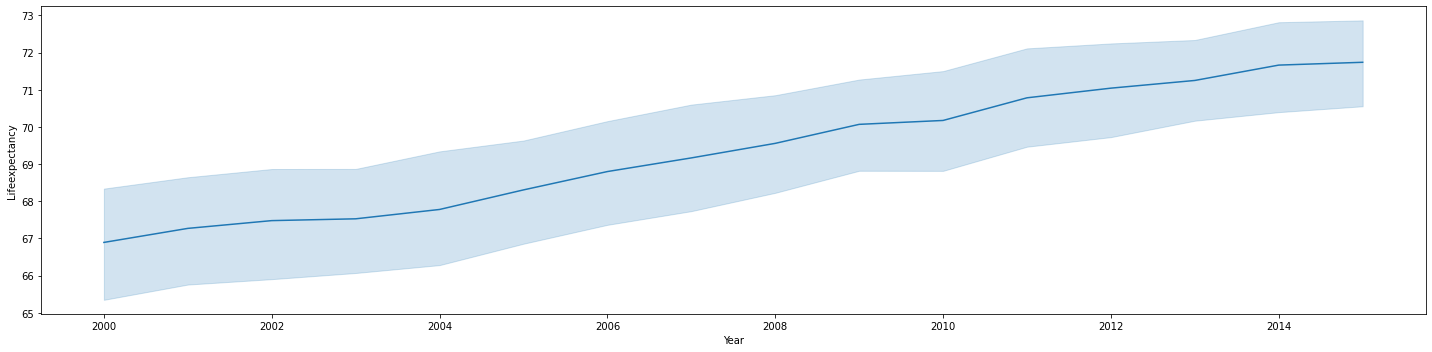

In [128]:
n=nou_df.groupby(['Year'], as_index=False).sum()
dd=px.line(n, x='Year', y='Undernourished_pop', title='In Millions')
dd.show()
sns.lineplot(data=df, x='Year', y='Lifeexpectancy')
plt.show()

In [129]:
nou_df.fillna(0, inplace=True)

pp=px.scatter_3d(nou_df, x='Year', y='Undernourished_pop', z='Lifeexpectancy', color='Status', template='ggplot2',opacity=0.8)

pp.show()

px.scatter(nou_df, x='Lifeexpectancy', y='Undernourished_pop', color='Country',template='plotly_dark',opacity=0.8,title='<b> Life Expectancy Versus Under Nourished Population')


In [130]:
cri_df

,Year,Status,Crime,Lifeexpectancy
0,2000,Developed,1.005313,76.803125
1,2000,Developing,-0.231393,64.765772
2,2001,Developed,-0.085951,77.128125
3,2001,Developing,-0.085951,65.154362
4,2002,Developed,1.095938,77.546875
5,2002,Developing,-0.256427,65.318121
6,2003,Developed,0.900000,77.940625
7,2003,Developing,-0.277180,65.292617
8,2004,Developed,0.782813,78.384375
9,2004,Developing,-0.303220,65.502685


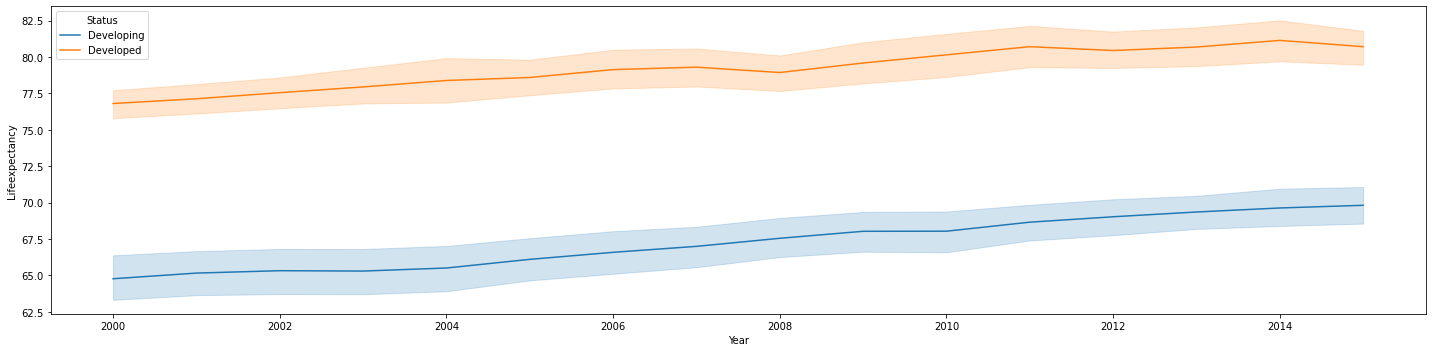

In [131]:
m=px.scatter(cri_df, x='Year', y='Crime', color='Status')

sns.lineplot(data=df, x='Year', y='Lifeexpectancy',hue='Status')
m.show()
plt.show()

In [132]:
cv=cri_df[['Crime', 'Lifeexpectancy','Year','Status']]
px.scatter(cv, x='Lifeexpectancy',y='Crime',color='Status')

In [185]:
dfm=cere_df[['Lifeexpectancy','Cereal_import_dependence','Arable_land_equipped_for_irrigation','Population_with_basic_drinking_water']]

dfm1=dfm.melt('Lifeexpectancy', var_name='val_cols', value_name='values')

dfm1

,Lifeexpectancy,val_cols,values
0,76.803125,Cereal_import_dependence,11.530546
1,64.765772,Cereal_import_dependence,36.231072
2,77.128125,Cereal_import_dependence,13.821171
3,65.154362,Cereal_import_dependence,35.564630
4,77.546875,Cereal_import_dependence,13.911796
...,...,...,...
91,69.350625,Population_with_basic_drinking_water,83.333466
92,81.137500,Population_with_basic_drinking_water,98.346464
93,69.626846,Population_with_basic_drinking_water,83.060049
94,80.709375,Population_with_basic_drinking_water,98.362089


In [186]:
px.line(x="Lifeexpectancy", y="values",color='val_cols', data_frame=dfm1)\
.update_layout(title="Comparing multiple parameters vs Life Expectancy",\
               xaxis_title="Life Expectancy",yaxis_title="Percentage",legend_title="Parameters")

In [249]:
# Taking additional attributes from second dataset and combine it to estimate LE.

In [202]:
alcohol_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/data.csv')  

In [203]:
alcohol_data

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,IsLatestYear,Dim1 type,Dim1,Dim1ValueCode,Dim2 type,Dim2,Dim2ValueCode,Dim3 type,Dim3,Dim3ValueCode,DataSourceDimValueCode,DataSource,FactValueNumericPrefix,FactValueNumeric,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SA_0000001688,"Alcohol, total per capita (15+) consumption (i...",text,SEAR,South-East Asia,Country,BGD,Bangladesh,Year,2019,True,Sex,Both sexes,BTSX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,0.00,0 [0 – 0],NaN,NaN,EN,2021-09-20T04:00:00.000Z
1,SA_0000001688,"Alcohol, total per capita (15+) consumption (i...",text,SEAR,South-East Asia,Country,BGD,Bangladesh,Year,2019,True,Sex,Female,FMLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,0.00,0 [0 – 0],NaN,NaN,EN,2021-09-20T04:00:00.000Z
2,SA_0000001688,"Alcohol, total per capita (15+) consumption (i...",text,SEAR,South-East Asia,Country,BGD,Bangladesh,Year,2019,True,Sex,Male,MLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,0.00,0 [0 – 0],NaN,NaN,EN,2021-09-20T04:00:00.000Z
3,SA_0000001688,"Alcohol, total per capita (15+) consumption (i...",text,EMR,Eastern Mediterranean,Country,KWT,Kuwait,Year,2019,True,Sex,Both sexes,BTSX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,0.00,0 [0 – 0],NaN,NaN,EN,2021-09-20T04:00:00.000Z
4,SA_0000001688,"Alcohol, total per capita (15+) consumption (i...",text,EMR,Eastern Mediterranean,Country,KWT,Kuwait,Year,2019,True,Sex,Female,FMLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,0.00,0 [0 – 0],NaN,NaN,EN,2021-09-20T04:00:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11233,SA_0000001688,"Alcohol, total per capita (15+) consumption (i...",text,AFR,Africa,Country,SLE,Sierra Leone,Year,2000,False,Sex,Male,MLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.54,NaN,NaN,7.30,NaN,11.54,9.54 [7.3 – 11.54],NaN,NaN,EN,2021-09-20T04:00:00.000Z
11234,SA_0000001688,"Alcohol, total per capita (15+) consumption (i...",text,AFR,Africa,Country,ZAF,South Africa,Year,2000,False,Sex,Both sexes,BTSX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.56,NaN,NaN,8.02,NaN,11.07,9.56 [8.02 – 11.07],NaN,NaN,EN,2021-09-20T04:00:00.000Z
11235,SA_0000001688,"Alcohol, total per capita (15+) consumption (i...",text,WPR,Western Pacific,Country,NRU,Nauru,Year,2000,False,Sex,Male,MLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.66,NaN,NaN,7.60,NaN,12.02,9.66 [7.6 – 12.02],NaN,NaN,EN,2021-09-20T04:00:00.000Z
11236,SA_0000001688,"Alcohol, total per capita (15+) consumption (i...",text,AMR,Americas,Country,PRY,Paraguay,Year,2000,False,Sex,Male,MLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.82,NaN,NaN,8.05,NaN,11.55,9.82 [8.05 – 11.55],NaN,NaN,EN,2021-09-20T04:00:00.000Z


In [204]:
alcohol_data.Period.value_counts()

2019    564
2012    564
2007    564
2008    564
2018    564
2010    564
2011    564
2009    564
2013    564
2014    564
2015    564
2016    564
2017    564
2006    558
2005    558
2004    558
2003    558
2002    558
2001    558
2000    558
Name: Period, dtype: int64

In [250]:
#Removing all the data with years > 2015

In [208]:
yr = alcohol_data[alcohol_data['Period']==2019].index        

alcohol_data.drop(yr, inplace=True)

In [209]:
alcohol_data.Period.value_counts()

2015    564
2014    564
2013    564
2012    564
2011    564
2010    564
2009    564
2008    564
2007    564
2006    558
2005    558
2004    558
2003    558
2002    558
2001    558
2000    558
Name: Period, dtype: int64

In [251]:
#Removed Male and female rows to merge it with common sex attributes in our first dataset.

In [211]:
yt = alcohol_data[alcohol_data['Dim1']=='Female'].index  

alcohol_data.drop(yt, inplace=True)

In [212]:
alcohol_data['Dim1']

2256     Both sexes
2259     Both sexes
2262     Both sexes
2265     Both sexes
2270     Both sexes
            ...    
11228    Both sexes
11229    Both sexes
11230    Both sexes
11232    Both sexes
11234    Both sexes
Name: Dim1, Length: 2994, dtype: object

In [213]:
alcohol_data=alcohol_data.reset_index()

In [214]:
alcohol_data

,index,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,IsLatestYear,Dim1 type,Dim1,Dim1ValueCode,Dim2 type,Dim2,Dim2ValueCode,Dim3 type,Dim3,Dim3ValueCode,DataSourceDimValueCode,DataSource,FactValueNumericPrefix,FactValueNumeric,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,2256,SA_0000001688,"Alcohol, total per capita (15+) consumption (i...",text,EMR,Eastern Mediterranean,Country,KWT,Kuwait,Year,2015,False,Sex,Both sexes,BTSX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,0.0000,NaN,0.000,0 [0 – 0],NaN,NaN,EN,2021-09-20T04:00:00.000Z
1,2259,SA_0000001688,"Alcohol, total per capita (15+) consumption (i...",text,AFR,Africa,Country,MRT,Mauritania,Year,2015,False,Sex,Both sexes,BTSX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,0.0000,NaN,0.000,0 [0 – 0],NaN,NaN,EN,2021-09-20T04:00:00.000Z
2,2262,SA_0000001688,"Alcohol, total per capita (15+) consumption (i...",text,EMR,Eastern Mediterranean,Country,SAU,Saudi Arabia,Year,2015,False,Sex,Both sexes,BTSX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,0.0000,NaN,0.000,0 [0 – 0],NaN,NaN,EN,2021-09-20T04:00:00.000Z
3,2265,SA_0000001688,"Alcohol, total per capita (15+) consumption (i...",text,EMR,Eastern Mediterranean,Country,SOM,Somalia,Year,2015,False,Sex,Both sexes,BTSX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,0.0000,NaN,0.000,0 [0 – 0],NaN,NaN,EN,2021-09-20T04:00:00.000Z
4,2270,SA_0000001688,"Alcohol, total per capita (15+) consumption (i...",text,SEAR,South-East Asia,Country,BGD,Bangladesh,Year,2015,False,Sex,Both sexes,BTSX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008,NaN,NaN,0.0001,NaN,0.035,0.008 [0.000 1 – 0.035],NaN,NaN,EN,2021-09-20T04:00:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,11228,SA_0000001688,"Alcohol, total per capita (15+) consumption (i...",text,AMR,Americas,Country,CAN,Canada,Year,2000,False,Sex,Both sexes,BTSX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.330,NaN,NaN,7.8300,NaN,11.010,9.33 [7.83 – 11.01],NaN,NaN,EN,2021-09-20T04:00:00.000Z
2990,11229,SA_0000001688,"Alcohol, total per capita (15+) consumption (i...",text,AMR,Americas,Country,GRD,Grenada,Year,2000,False,Sex,Both sexes,BTSX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.400,NaN,NaN,7.8300,NaN,11.290,9.4 [7.83 – 11.29],NaN,NaN,EN,2021-09-20T04:00:00.000Z
2991,11230,SA_0000001688,"Alcohol, total per capita (15+) consumption (i...",text,AMR,Americas,Country,USA,United States of America,Year,2000,False,Sex,Both sexes,BTSX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.400,NaN,NaN,8.0600,NaN,10.910,9.4 [8.06 – 10.91],NaN,NaN,EN,2021-09-20T04:00:00.000Z
2992,11232,SA_0000001688,"Alcohol, total per capita (15+) consumption (i...",text,EUR,Europe,Country,POL,Poland,Year,2000,False,Sex,Both sexes,BTSX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.450,NaN,NaN,7.8000,NaN,11.110,9.45 [7.8 – 11.11],NaN,NaN,EN,2021-09-20T04:00:00.000Z


In [252]:
# Cleaning the values using string slicing and replacing the charecter witb replace function

In [215]:
alcohol_data.Value.value_counts()

0 [0 – 0]               75
0.19 [0.13 – 0.29]       3
0.25 [0.097 – 0.56]      3
1.84 [1.33 – 2.46]       2
10.13 [8.58 – 11.79]     2
                        ..
5.61 [4.31 – 6.98]       1
5.78 [4.42 – 7.2]        1
5.78 [4.87 – 6.77]       1
5.87 [4.83 – 7]          1
2.01 [1.49 – 2.66]       1
Name: Value, Length: 2722, dtype: int64

In [216]:
p1=alcohol_data.Value.to_list()

In [217]:
e=[]
e1=[]
for i in p1:
  e.append(i[:4])
for i in e:
  e1.append(i.replace(' [0','').replace(' [1', '').replace(' [3','').replace(' [5','').replace(' [7','').replace(' [2','')\
            .replace(' [4','').replace(' [6','').replace(' [8','').replace(' [9','').replace(' [',''))

In [218]:
alcohol_data['alco_value']=e1

In [219]:
alcohol_data.columns.get_loc('alco_value')

35

In [220]:
final_alco=alcohol_data.iloc[:,[8,10,35]]

final_alco

,Location,Period,alco_value
0,Kuwait,2015,0
1,Mauritania,2015,0
2,Saudi Arabia,2015,0
3,Somalia,2015,0
4,Bangladesh,2015,0.00
...,...,...,...
2989,Canada,2000,9.33
2990,Grenada,2000,9.4
2991,United States of America,2000,9.4
2992,Poland,2000,9.45


In [221]:
final_alco.dtypes

Location      object
Period         int64
alco_value    object
dtype: object

In [222]:
re={'Location':'Country','Period':'Year'}
final_alco.rename(columns=re, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [223]:
final_alco

,Country,Year,alco_value
0,Kuwait,2015,0
1,Mauritania,2015,0
2,Saudi Arabia,2015,0
3,Somalia,2015,0
4,Bangladesh,2015,0.00
...,...,...,...
2989,Canada,2000,9.33
2990,Grenada,2000,9.4
2991,United States of America,2000,9.4
2992,Poland,2000,9.45


In [224]:
final_merged=cer_df5.merge(final_alco,how='left')

In [225]:
final_merged

,AdultMortality,Alcohol,BMI,Country,Diphtheria,GDP,HIV/AIDS,HepatitisB,Incomecompositionofresources,Lifeexpectancy,Measles,Polio,Population,Schooling,Status,Totalexpenditure,Year,infantdeaths,percentageexpenditure,Cereal_import_dependence,Arable_land_equipped_for_irrigation,Population_with_basic_drinking_water,Undernourished_pop,Crime,alco_value
0,263.0,0.01,19.1,Afghanistan,65.0,584.259210,0.1,65.0,0.479,65.0,1154,6.0,33736494.0,10.1,Developing,8.16,2015,62,71.279624,34.2,41.5,61.3,7.800000,-2.570000,0.00
1,271.0,0.01,18.6,Afghanistan,62.0,612.696514,0.1,62.0,0.476,59.9,492,58.0,327582.0,10.0,Developing,8.18,2014,64,73.523582,27.0,41.4,58.7,7.400000,-2.410000,0.00
2,268.0,0.01,18.1,Afghanistan,64.0,631.744976,0.1,64.0,0.470,59.9,430,62.0,31731688.0,9.9,Developing,8.13,2013,66,73.219243,23.2,41.3,56.0,6.900000,-2.520000,0.01
3,272.0,0.01,17.6,Afghanistan,67.0,669.959000,0.1,67.0,0.463,59.5,2787,67.0,3696958.0,9.8,Developing,8.52,2012,69,78.184215,21.0,41.2,53.4,6.700000,-2.420000,0.01
4,275.0,0.01,17.2,Afghanistan,68.0,63.537231,0.1,68.0,0.454,59.2,3013,68.0,2978599.0,9.5,Developing,7.87,2011,71,7.097109,26.2,41.2,50.8,6.600000,-2.500000,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2901,723.0,4.36,27.1,Zimbabwe,65.0,454.366654,33.6,68.0,0.407,44.3,31,67.0,12777511.0,9.2,Developing,7.13,2004,27,0.000000,28.7,4.1,70.7,5.589222,-1.210000,2.64
2902,715.0,4.06,26.7,Zimbabwe,68.0,453.351155,36.7,7.0,0.418,44.5,998,7.0,12633897.0,9.5,Developing,6.52,2003,26,0.000000,23.8,4.2,71.2,5.589222,-1.090000,2.72
2903,73.0,4.43,26.3,Zimbabwe,71.0,57.348340,39.8,73.0,0.427,44.8,304,73.0,125525.0,10.0,Developing,6.53,2002,25,0.000000,31.6,4.3,71.7,5.589222,-1.520000,2.5
2904,686.0,1.72,25.9,Zimbabwe,75.0,548.587312,42.1,76.0,0.427,45.3,529,76.0,12366165.0,9.8,Developing,6.16,2001,25,0.000000,22.5,4.3,72.0,5.589222,-0.085951,2.48


In [226]:
final_merged.alco_value.fillna(0, inplace=True)

In [227]:
final_merged.isnull().sum()

AdultMortality                          0
Alcohol                                 0
BMI                                     0
Country                                 0
Diphtheria                              8
GDP                                     0
HIV/AIDS                                0
HepatitisB                              0
Incomecompositionofresources            0
Lifeexpectancy                          0
Measles                                 0
Polio                                   0
Population                              0
Schooling                               0
Status                                  0
Totalexpenditure                        0
Year                                    0
infantdeaths                            0
percentageexpenditure                   0
Cereal_import_dependence                0
Arable_land_equipped_for_irrigation     0
Population_with_basic_drinking_water    0
Undernourished_pop                      0
Crime                             

In [228]:
final_merged.alco_value=final_merged.alco_value.astype('float')

In [229]:
al=final_merged.groupby(['Country'],as_index = False)['alco_value', 'Lifeexpectancy'].mean()


px.scatter(al, y='alco_value', x='Lifeexpectancy', color='Country')

# This Data sample doesn't seem to be so Accurate?????........

<ipython-input-229-8c34f5e74bd3>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [230]:
bmi=final_merged.groupby(['Country', 'Year'],as_index = False)[['BMI', 'Lifeexpectancy']].sum()

px.scatter(data_frame=bmi, y='BMI', x='Lifeexpectancy', color='Country', title='Obese Population Percentage vs LE')

In [231]:
final_merged

,AdultMortality,Alcohol,BMI,Country,Diphtheria,GDP,HIV/AIDS,HepatitisB,Incomecompositionofresources,Lifeexpectancy,Measles,Polio,Population,Schooling,Status,Totalexpenditure,Year,infantdeaths,percentageexpenditure,Cereal_import_dependence,Arable_land_equipped_for_irrigation,Population_with_basic_drinking_water,Undernourished_pop,Crime,alco_value
0,263.0,0.01,19.1,Afghanistan,65.0,584.259210,0.1,65.0,0.479,65.0,1154,6.0,33736494.0,10.1,Developing,8.16,2015,62,71.279624,34.2,41.5,61.3,7.800000,-2.570000,0.00
1,271.0,0.01,18.6,Afghanistan,62.0,612.696514,0.1,62.0,0.476,59.9,492,58.0,327582.0,10.0,Developing,8.18,2014,64,73.523582,27.0,41.4,58.7,7.400000,-2.410000,0.00
2,268.0,0.01,18.1,Afghanistan,64.0,631.744976,0.1,64.0,0.470,59.9,430,62.0,31731688.0,9.9,Developing,8.13,2013,66,73.219243,23.2,41.3,56.0,6.900000,-2.520000,0.01
3,272.0,0.01,17.6,Afghanistan,67.0,669.959000,0.1,67.0,0.463,59.5,2787,67.0,3696958.0,9.8,Developing,8.52,2012,69,78.184215,21.0,41.2,53.4,6.700000,-2.420000,0.01
4,275.0,0.01,17.2,Afghanistan,68.0,63.537231,0.1,68.0,0.454,59.2,3013,68.0,2978599.0,9.5,Developing,7.87,2011,71,7.097109,26.2,41.2,50.8,6.600000,-2.500000,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2901,723.0,4.36,27.1,Zimbabwe,65.0,454.366654,33.6,68.0,0.407,44.3,31,67.0,12777511.0,9.2,Developing,7.13,2004,27,0.000000,28.7,4.1,70.7,5.589222,-1.210000,2.64
2902,715.0,4.06,26.7,Zimbabwe,68.0,453.351155,36.7,7.0,0.418,44.5,998,7.0,12633897.0,9.5,Developing,6.52,2003,26,0.000000,23.8,4.2,71.2,5.589222,-1.090000,2.72
2903,73.0,4.43,26.3,Zimbabwe,71.0,57.348340,39.8,73.0,0.427,44.8,304,73.0,125525.0,10.0,Developing,6.53,2002,25,0.000000,31.6,4.3,71.7,5.589222,-1.520000,2.50
2904,686.0,1.72,25.9,Zimbabwe,75.0,548.587312,42.1,76.0,0.427,45.3,529,76.0,12366165.0,9.8,Developing,6.16,2001,25,0.000000,22.5,4.3,72.0,5.589222,-0.085951,2.48


In [232]:
final_merged.columns

Index(['AdultMortality', 'Alcohol', 'BMI', 'Country', 'Diphtheria', 'GDP',
       'HIV/AIDS', 'HepatitisB', 'Incomecompositionofresources',
       'Lifeexpectancy', 'Measles', 'Polio', 'Population', 'Schooling',
       'Status', 'Totalexpenditure', 'Year', 'infantdeaths',
       'percentageexpenditure', 'Cereal_import_dependence',
       'Arable_land_equipped_for_irrigation',
       'Population_with_basic_drinking_water', 'Undernourished_pop', 'Crime',
       'alco_value'],
      dtype='object')

In [233]:
exp=final_merged.groupby(['Country'], as_index=False)[['Totalexpenditure', 'Lifeexpectancy']].mean()

px.scatter(exp, y='Totalexpenditure', x='Lifeexpectancy', color='Country')

In [254]:
#The Final Dataset is ready for Modelling and Evaluation.

In [ ]:
final_merged.to_csv('/content/drive/My Drive/final_merged.csv')